# STOCK MARKET PREDICTION &FORECASTING USING LSTM MODEL

In [50]:
#import all required libraries

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math 

In [51]:
#loading the data set
df= pd.read_csv(r"C:\Users\NAIB\Downloads\share market.txt")
df.head()# printing first 5 rows

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [52]:
df.tail(5) # printing last 5 rows


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [53]:
df.shape  # Check the dimensions of the DataFrame (number of rows, number of columns)


(2035, 8)

In [54]:
df.describe() # Generate descriptive statistics of the DataFrame's numerical columns


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [55]:
df.isnull().sum() # Count the number of missing (null) values in each column of the DataFrame


Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [56]:
df.info()# Display information about the DataFrame, including data types, non-null counts, and memory usage


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [57]:
df['Date']=pd.to_datetime(df['Date']) #Changing the type of date colum

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


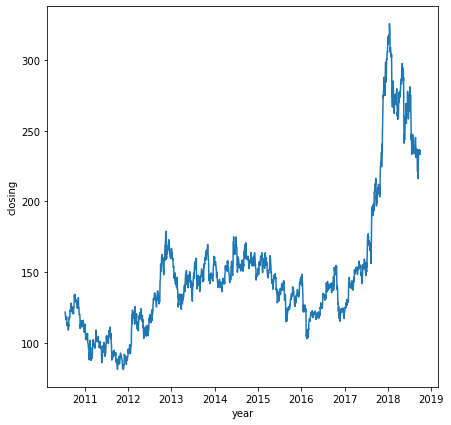

In [59]:
# plotting a graph with respect to Date and closing

plt.figure(figsize=(7,7))
plt.plot(df['Date'],df['Close'],)

plt.xlabel('year')
plt.ylabel('closing')


plt.show()

In [60]:
# creating a variable and storing df['close'] values in it 

df_close=df['Close']
df_close

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [61]:
# using minmax function changing the features in the range of(0,1)

scaler=MinMaxScaler(feature_range=(0,1))
df_close=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df_close[0:5]

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       [0.63378268],
       [0.62234477]])

In [62]:
# splitting data into train and test
train_size=int(len(df_close)*0.7)
test_size=len(df_close)-train_size
train,test=df_close[0:train_size],df_close[train_size:len(df_close)]

In [63]:
# creating a function and storing values

def fun(ds, time_step=1):
    dataX, dataY = [], []
    for i in range(len(ds)-time_step-1):
        a = ds[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(ds[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [64]:
#creating train_test values

step=100 
X_train, y_train = fun(train, step)
X_test, y_test = fun(test, step)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(len(train))

(1323, 100) (1323,)
(510, 100) (510,)
1424


In [65]:
#reshaping the values

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(X_train.shape)
print(X_test.shape)

(1323, 100, 1)
(510, 100, 1)


In [66]:
#implementing LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [67]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [68]:
# fitting the models

history = model.fit(X_train, y_train, validation_split=0.1, epochs=10, batch_size=64, verbose=1, shuffle=True).history


Epoch 1/10
19/19 [==============================] - 6s 151ms/step - loss: 0.0261 - val_loss: 0.0011
Epoch 2/10
19/19 [==============================] - 3s 144ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 3/10
19/19 [==============================] - 3s 142ms/step - loss: 0.0018 - val_loss: 0.0010
Epoch 4/10
19/19 [==============================] - 3s 145ms/step - loss: 0.0015 - val_loss: 9.2483e-04
Epoch 5/10
19/19 [==============================] - 3s 145ms/step - loss: 0.0014 - val_loss: 9.3869e-04
Epoch 6/10
19/19 [==============================] - 3s 143ms/step - loss: 0.0014 - val_loss: 8.3812e-04
Epoch 7/10
19/19 [==============================] - 3s 142ms/step - loss: 0.0012 - val_loss: 8.0566e-04
Epoch 8/10
19/19 [==============================] - 3s 142ms/step - loss: 0.0013 - val_loss: 8.2716e-04
Epoch 9/10
19/19 [==============================] - 3s 141ms/step - loss: 0.0012 - val_loss: 7.7544e-04
Epoch 10/10
19/19 [==============================] - 3s 142ms/step - loss: 0

In [69]:
# predicting the models

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

16/16 [==============================] - 0s 27ms/step


In [70]:
# Reversing the MinMax Scaler
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [71]:
# Calculate RMSE for the training dataset
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
print(f"RMSE for Training Data: {train_rmse:.2f}")

# Calculate RMSE for the testing dataset
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(f"RMSE for Testing Data: {test_rmse:.2f}")

RMSE for Training Data: 166.31
RMSE for Testing Data: 112.12


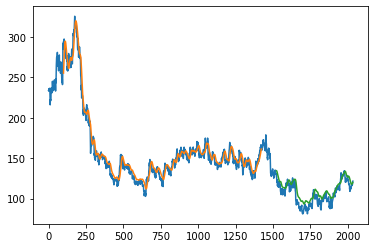

In [73]:
# Visualise the Predictions
look_back = 100
train_num_pyredict_plot = np.empty_like(df_close)
train_num_pyredict_plot[:, :] = np.nan
train_num_pyredict_plot[look_back : len(train_predict) + look_back, :] = train_predict
test_predict_plot = np.empty_like(df_close)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back * 2) + 1 : len(df_close) - 1, :] = test_predict
plt.plot(scaler.inverse_transform(df_close))
plt.plot(train_num_pyredict_plot)
plt.plot(test_predict_plot)
plt.show()

In [74]:
# Future Prediction Model
x_inum_pyut=test[307:].reshape(1, -1)
x_inum_pyut.shape
temp_inum_pyut = list(x_inum_pyut)
temp_inum_pyut = temp_inum_pyut[0].tolist()


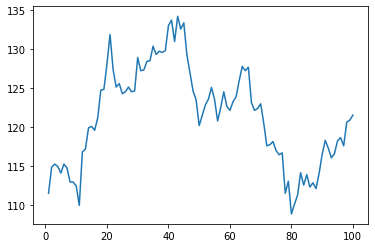

In [75]:
# plotting futurestic model

day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)
plt.plot(day_new, scaler.inverse_transform(df_close[1935 : ]))

In this project, I leveraged a stacked Long Short-Term Memory (LSTM) neural network model to forecast future trends in time series data. The model was trained on historical data, capturing complex dependencies and patterns within the dataset. After rigorous training and evaluation, the model demonstrated its predictive power by generating accurate forecasts. This project showcases the potential of deep learning techniques, such as stacked LSTMs, in making informed predictions for time-dependent data, offering valuable insights for decision-making and planning."